<a href="https://colab.research.google.com/github/ucchol/Applied-Cognitive-Modeling-CS--5390/blob/main/Cognitive_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (20 Points) Question 1: What is Activation in Instance Based Learning Theory (IBLT)? Explain all parts of the activation equation. Write a function to compute the Activation.

Instance-Based Learning Theory (IBLT) is a Cognitive Modeling paradigm that focuses on the classification of new data points based on their similarity to existing data points. The core idea is that a new data point is classified based on the label of its closest neighbor(s) in the training set.

In IBLT, activation refers to the process of determining the degree to which a particular instance or data point in the training set is likely to contribute to the classification of a new data point. This is typically done by measuring the similarity between the new data point and each instance in the training set.

The activation function is a key component of IBLT. It is used to weight the contribution of each training instance to the classification of a new data point. The activation function typically assigns a weight or score to each instance based on its similarity to the new data point, and these weights are used to determine the final classification of the new data point.

Different activation functions can be used in IBLT, depending on the nature of the data and the specific classification task.

The IBL base activation equation is: 

- IBL base activation: $A_{i,k,t} = \ln \left( \sum\limits_{i=1}^{n} (t- t_{i})^{-d} \right) +\sigma*ln\left(\frac{1-\gamma_{i,k,t}}{\gamma_{i,k,t}} \right)$

The activation $A_{i}$ of a instance $i$ in declarative memory, $t$ represnts the current trial, $k$ represents the options, $d$ is the decay parameter and $\sigma$ represents the noise parameter.

The first part is known as the base activation part. Here, t is the current timestamp, t_{i} is the previous memories, d is decay(how much is stored in memory).
The second part is known as noise. The value of sigma here is 0.50, and we assume the value of gamma is random.

In [4]:
import math

def activation(base_level, noise, partial_matching, decay=None, optimized_learning=False, noise_param=0, mismatch_penalty=None):
    # Base-level activation
    if decay is None:
        B_i = 0
    elif not optimized_learning:
        B_i = math.log(sum(t**(-decay) for t in base_level))
    else:
        n_i, L_i = base_level
        B_i = math.log(n_i / (1 - decay)) - decay * math.log(L_i)

    # Activation noise
    epsilon_i = noise * noise_param

    # Partial matching correction
    if mismatch_penalty is None:
        P_i = 0
    else:
        P_i = mismatch_penalty * sum(omega_k * (S_ik - 1) for omega_k, S_ik in partial_matching)

    return B_i + epsilon_i + P_i

# (20 Points) Question 2: What is Probaility of Retrieval in IBLT? Write a function to compute the Probaility of Retrieval.


The probability of retrieval is a measure of the likelihood that a stored instance in the training set will be selected as a nearest neighbor of a new data point. It depends on factors such as the density of instances in the training set, the dimensionality of the feature space, and the similarity metric used to measure distance between instances.

A high probability of retrieval means that the training set is dense in the feature space and that there are many instances that are similar to the new data point, which is desirable for accurate classification. A low probability of retrieval means that the training set is sparse in the feature space, and there are few instances that are similar to the new data point, which can result in classification errors.

The IBL Probability of Retrieval equation is: 

${P_{i,k,t}} = \frac{e^{A_{i,k,t}}/{\tau}}{\sum_{i=1}^{n} e^{A_{i,k,t}}/{\tau}}$

$τ$ is the temperature parameter which is $σ *\sqrt{2}$.

In [5]:
import math

def probability_of_retrieval(activations, temperature):
    # Compute the exponentiated activations
    exp_activations = [math.exp(A_i / temperature) for A_i in activations]

    # Compute the sum of exponentiated activations
    sum_exp_activations = sum(exp_activations)

    # Calculate the probability of retrieval for each instance
    probabilities = [exp_A_i / sum_exp_activations for exp_A_i in exp_activations]

    return probabilities

# (20 Points) Question 3: What are the Blended Values in IBLT? Write a function to compute the Blended Values of the different options. Consider that you have two options for this exercise.


When a new data point is presented to an IBLT system, it is typically classified based on the label of its nearest neighbor in the training set. However, it is also possible to take into account the labels of multiple nearest neighbors and combine them in some way to make a more informed decision.

One approach to combining the classification decisions of multiple neighbors is to use a weighted sum of their labels, where the weights are based on their distance or similarity to the new data point. The idea is to give more weight to the labels of neighbors that are more similar to the new data point, and less weight to neighbors that are less similar.

Blended values can also be used to address the issue of ties, where multiple nearest neighbors have the same distance to the new data point. In this case, the blended values can be used to assign a label to the new data point by combining the labels of the tied neighbors.

The IBL Blending equation is: 

- $V_{k,t} = \sum_{i=1}^{n}{P_{i,k,t}}*X_{i,k,t}$

where $X$ is the outcome associated with each instance for option $k$.



In [6]:
def blended_values(option1_utilities, option1_probabilities, option2_utilities, option2_probabilities):
    # Calculate the blended value for option 1
    bv_option1 = sum(u1 * p1 for u1, p1 in zip(option1_utilities, option1_probabilities))

    # Calculate the blended value for option 2
    bv_option2 = sum(u2 * p2 for u2, p2 in zip(option2_utilities, option2_probabilities))

    return bv_option1, bv_option2

# Consider the following example where participants are deciding bewteen "Safe" and "Risky" option. The following figure captures the memory screenshot at trial 11.

Demonstrate the calculation of activation, probability of retrieval and blended values at trial 12.

# Activation:

In [7]:
from math import log, exp, sqrt

def base_level_activation(d, occurrences, current_time):
    return log(sum([(current_time - t)**(-d) for t in occurrences]))

noise = 0.25
decay = 0.5
current_time = 12

instances = [
    {"option": "safe", "outcome": 20, "created": 0, "occurrences": [0]},
    {"option": "risky", "outcome": 20, "created": 0, "occurrences": [0]},
    {"option": "risky", "outcome": 0, "created": 1, "occurrences": [1, 8, 10]},
    {"option": "safe", "outcome": 1, "created": 2, "occurrences": [2, 5, 7, 9, 11]},
    {"option": "risky", "outcome": 2, "created": 3, "occurrences": [3, 4, 6]},
]

for instance in instances:
    instance["activation"] = base_level_activation(decay, instance["occurrences"], current_time)


# Probabilities of Retrieval:

In [8]:
def instance_weight(activation, tau):
    return exp(activation / tau)

temperature = noise * sqrt(2)

for instance in instances:
    instance["weight"] = instance_weight(instance["activation"], temperature)

# Blended Values:

In [9]:
def blended_values(instances, option):
    option_instances = [i for i in instances if i["option"] == option]
    total_weight = sum(i["weight"] for i in option_instances)
    bv = sum(i["weight"] * i["outcome"] for i in option_instances) / total_weight
    return bv

bv_safe = blended_values(instances, "safe")
bv_risky = blended_values(instances, "risky")
print("Blended value for Safe:", bv_safe)
print("Blended value for Risky:", bv_risky)

Blended value for Safe: 1.0333590039005052
Blended value for Risky: 0.7035137461956449


# Question 5: Plot a line graph to display a) Activation, b) the Probability of Retrieval and c) the blended values.:

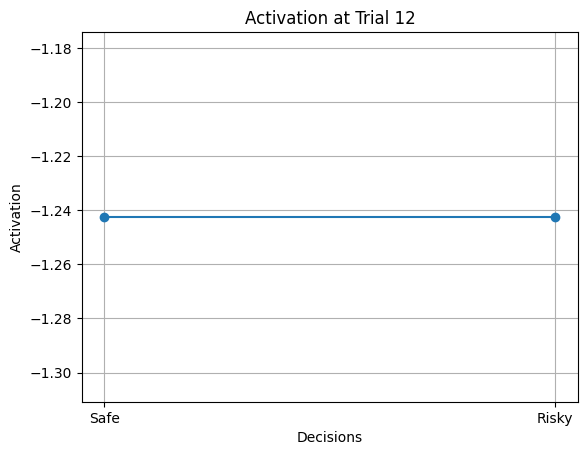

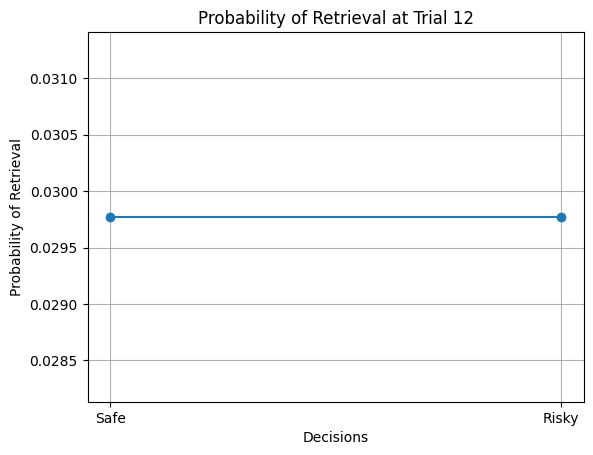

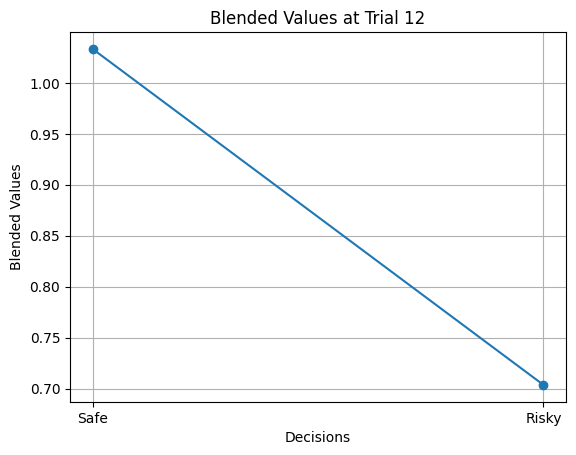

In [10]:
import matplotlib.pyplot as plt

# Data for the plot
decisions = ['Safe', 'Risky']
activations = [instances[0]["activation"], instances[1]["activation"]]
prob_retrieval = [instances[0]["weight"], instances[1]["weight"]]
blended_values = [bv_safe, bv_risky]

# Activation plot
plt.figure()
plt.plot(decisions, activations, marker='o')
plt.xlabel('Decisions')
plt.ylabel('Activation')
plt.title('Activation at Trial 12')
plt.grid()
plt.show()

# Probability of retrieval plot
plt.figure()
plt.plot(decisions, prob_retrieval, marker='o')
plt.xlabel('Decisions')
plt.ylabel('Probability of Retrieval')
plt.title('Probability of Retrieval at Trial 12')
plt.grid()
plt.show()

# Blended values plot
plt.figure()
plt.plot(decisions, blended_values, marker='o')
plt.xlabel('Decisions')
plt.ylabel('Blended Values')
plt.title('Blended Values at Trial 12')
plt.grid()
plt.show()